WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\Users\steve\anaconda3\envs\BayesReg\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\steve\anaconda3\envs\BayesReg\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 914 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\steve\anaconda3\envs\BayesReg\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


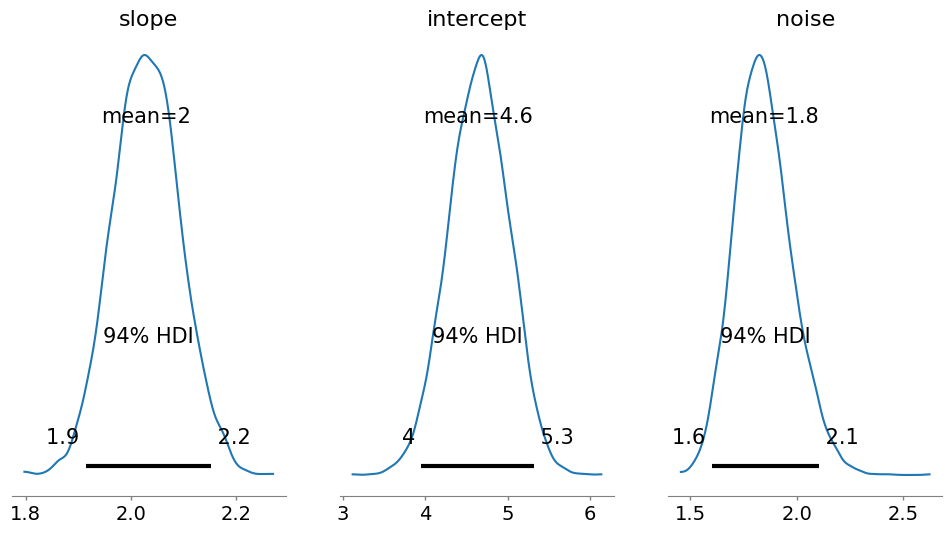

In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Sample data: Replace this with your own dataset
np.random.seed(42)
x = np.linspace(0, 10, 100)
true_slope, true_intercept = 2, 5
true_noise = 2
y = true_slope * x + true_intercept + np.random.normal(scale=true_noise, size=len(x))

# Model specification
with pm.Model() as bayesian_model:
    # Prior distributions for the parameters
    slope = pm.Normal("slope", mu=0, sd=10)
    intercept = pm.Normal("intercept", mu=0, sd=10)
    noise = pm.HalfCauchy("noise", beta=10)

    # Expected value of the outcome (Likelihood function)
    mu = slope * x + intercept

    # Likelihood (sampling distribution) of the observations
    likelihood = pm.Normal("likelihood", mu=mu, sd=noise, observed=y)

# Model fitting
with bayesian_model:
    # Sampling from the posterior distribution using Markov Chain Monte Carlo (MCMC)
    trace = pm.sample(2000, tune=1000, chains=4, cores=1)

# Posterior analysis and visualization
pm.plot_posterior(trace, var_names=["slope", "intercept", "noise"], figsize=(12, 6))
plt.show()


C:\Users\steve\AppData\Local\Temp\ipykernel_26308\1038424217.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


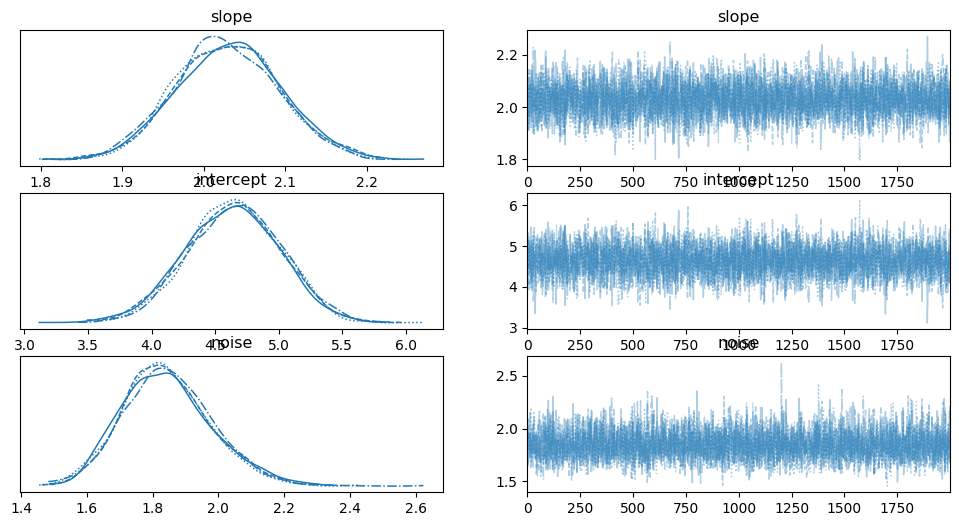

In [2]:
pm.traceplot(trace)
plt.show()


C:\Users\steve\AppData\Local\Temp\ipykernel_26308\3700193154.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\steve\anaconda3\envs\BayesReg\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


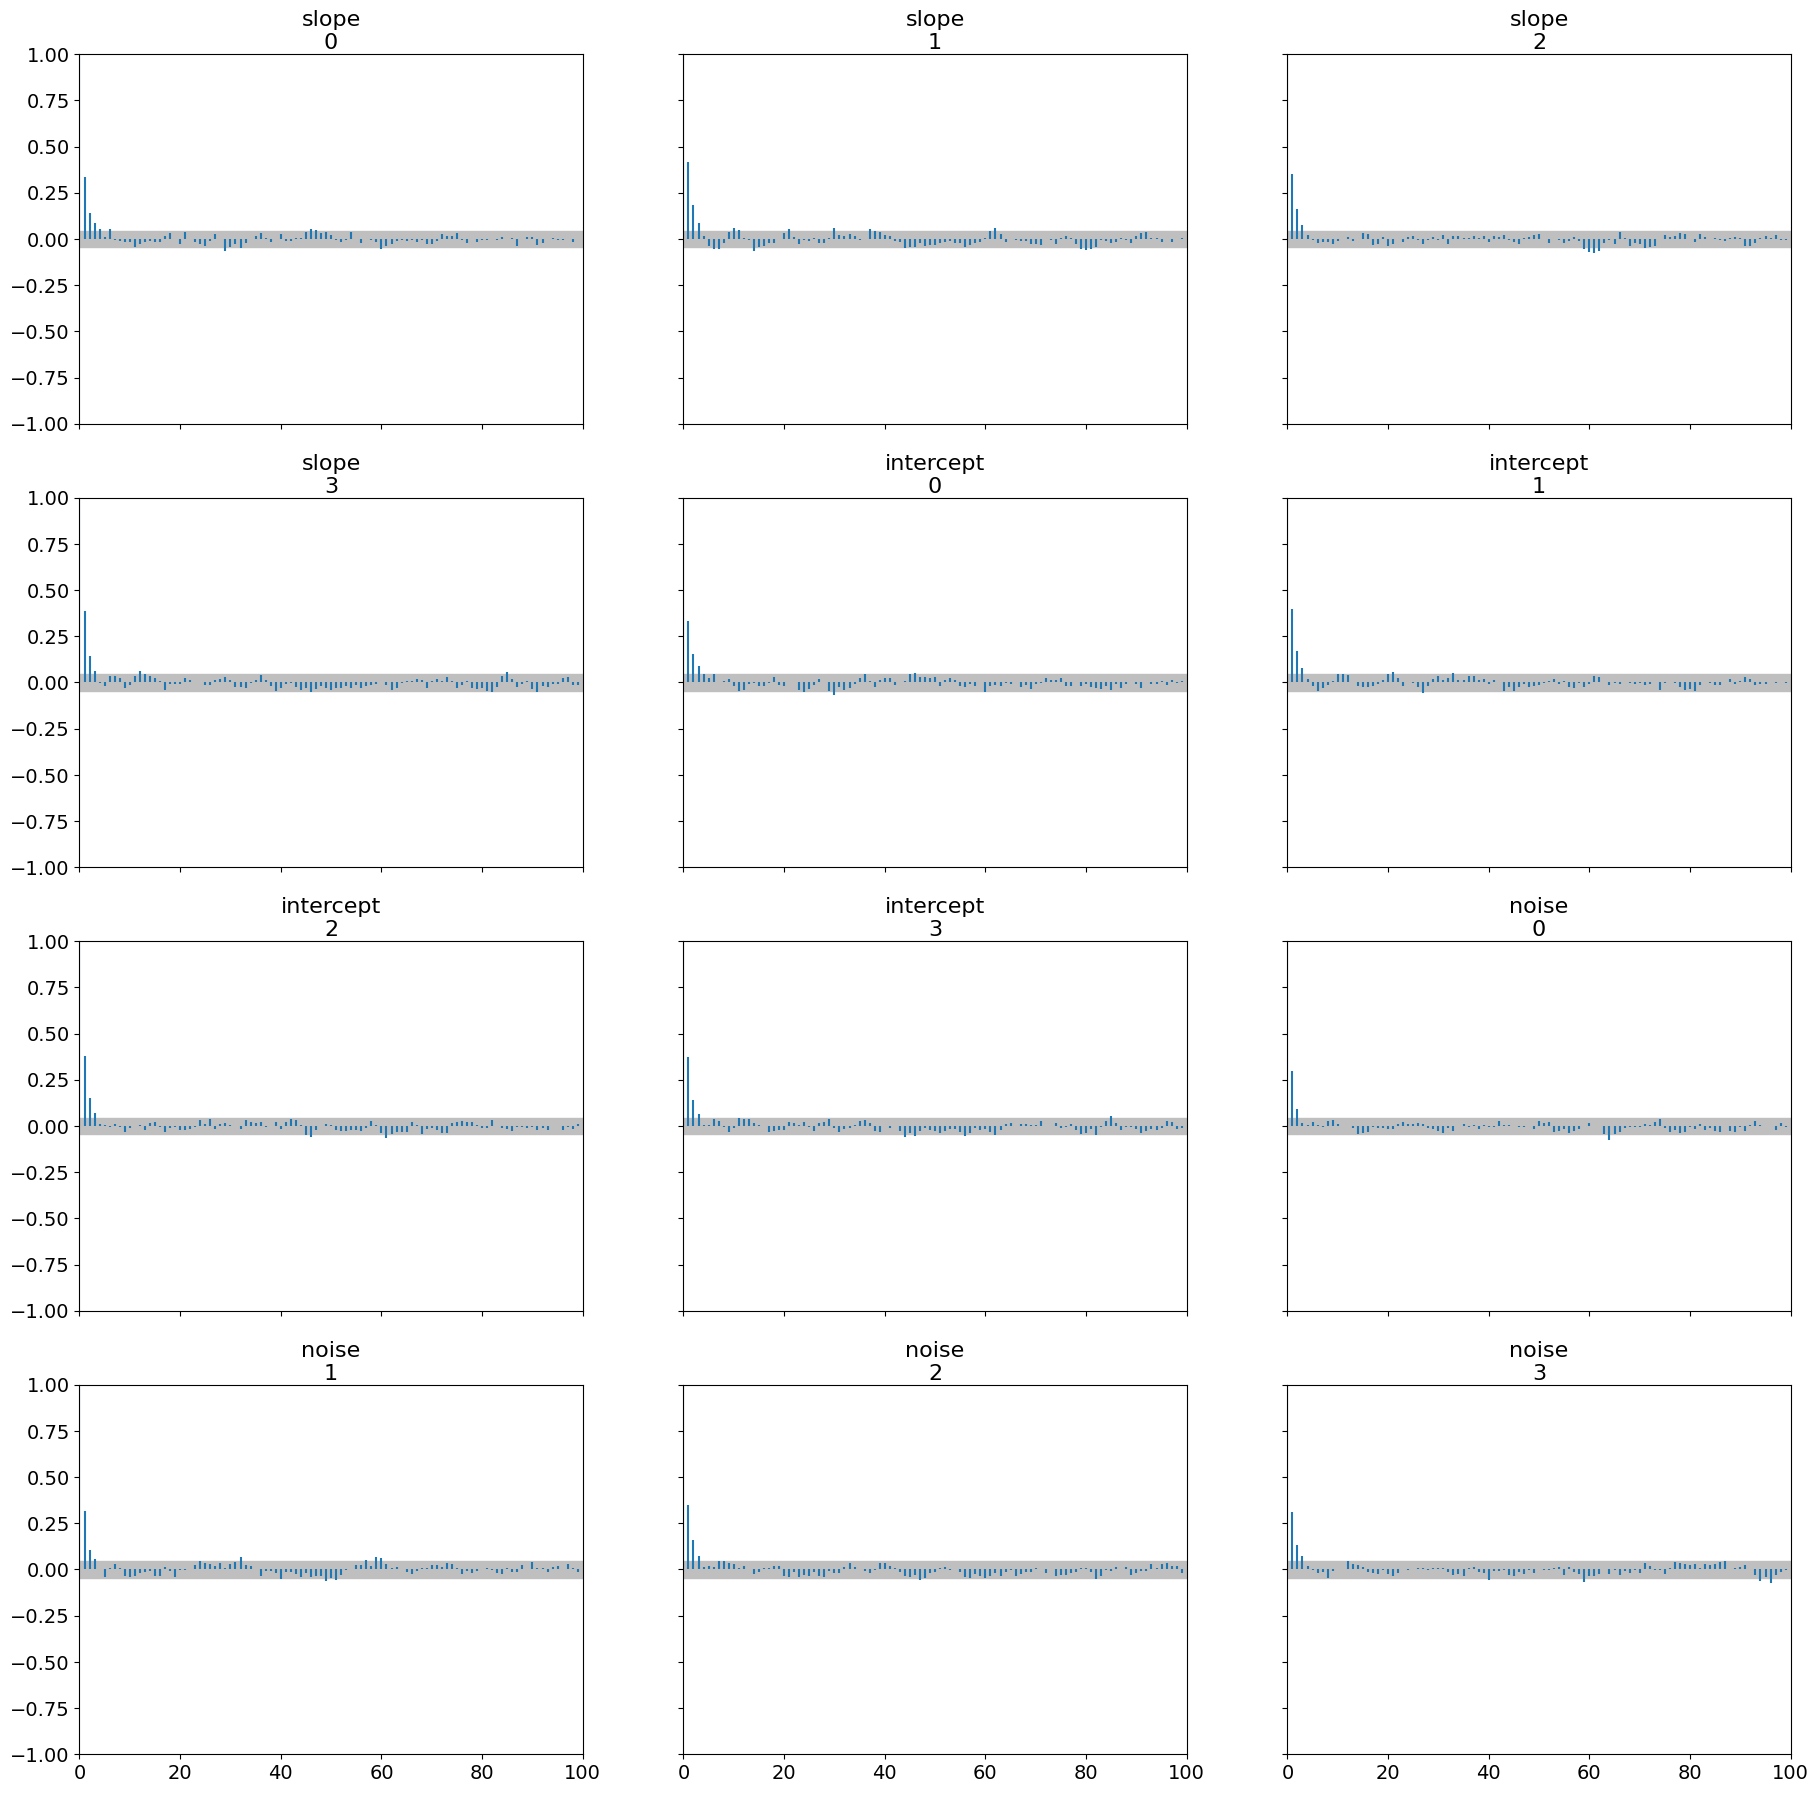

In [3]:
pm.autocorrplot(trace)
plt.show()


Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\steve\anaconda3\envs\BayesReg\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


AttributeError: Line2D.set() got an unexpected keyword argument 'kde_plot'

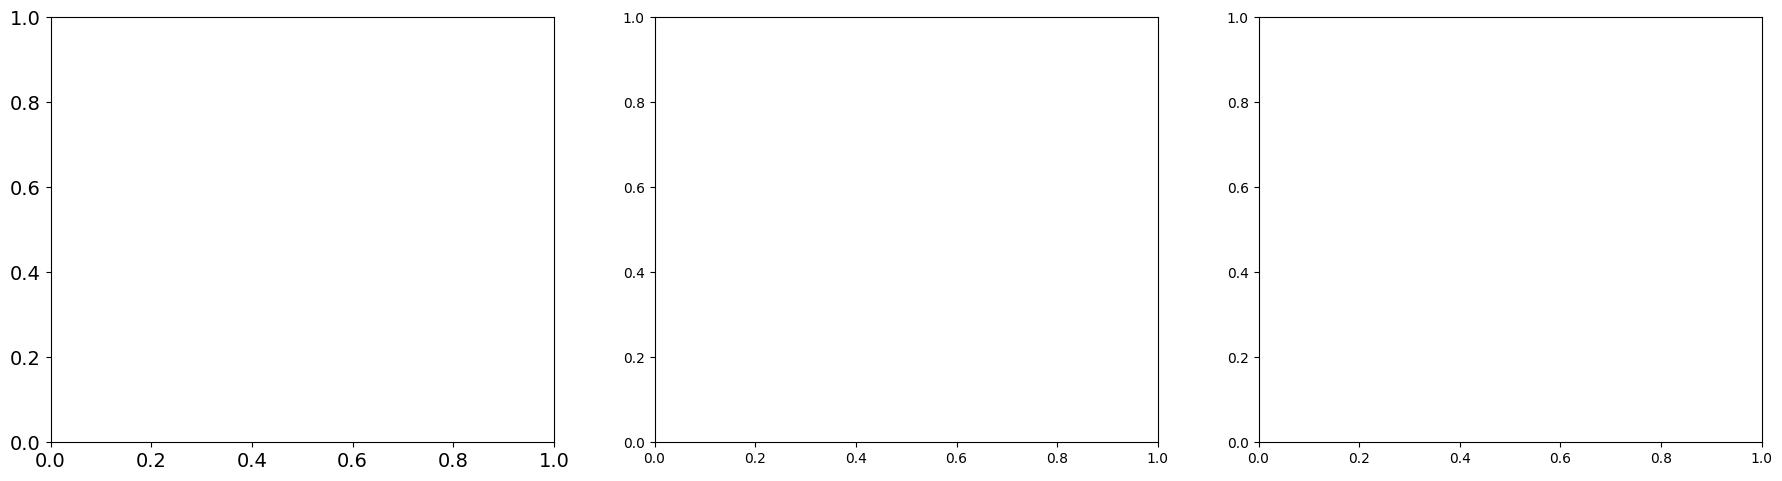

In [4]:
pm.plot_posterior(trace, kde_plot=True)
plt.show()


C:\Users\steve\AppData\Local\Temp\ipykernel_26308\2020899326.py:1: DeprecationWarning: The function `pairplot` from PyMC3 is just an alias for `plot_pair` from ArviZ. Please switch to `pymc3.plot_pair` or `arviz.plot_pair`.
  pm.pairplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.


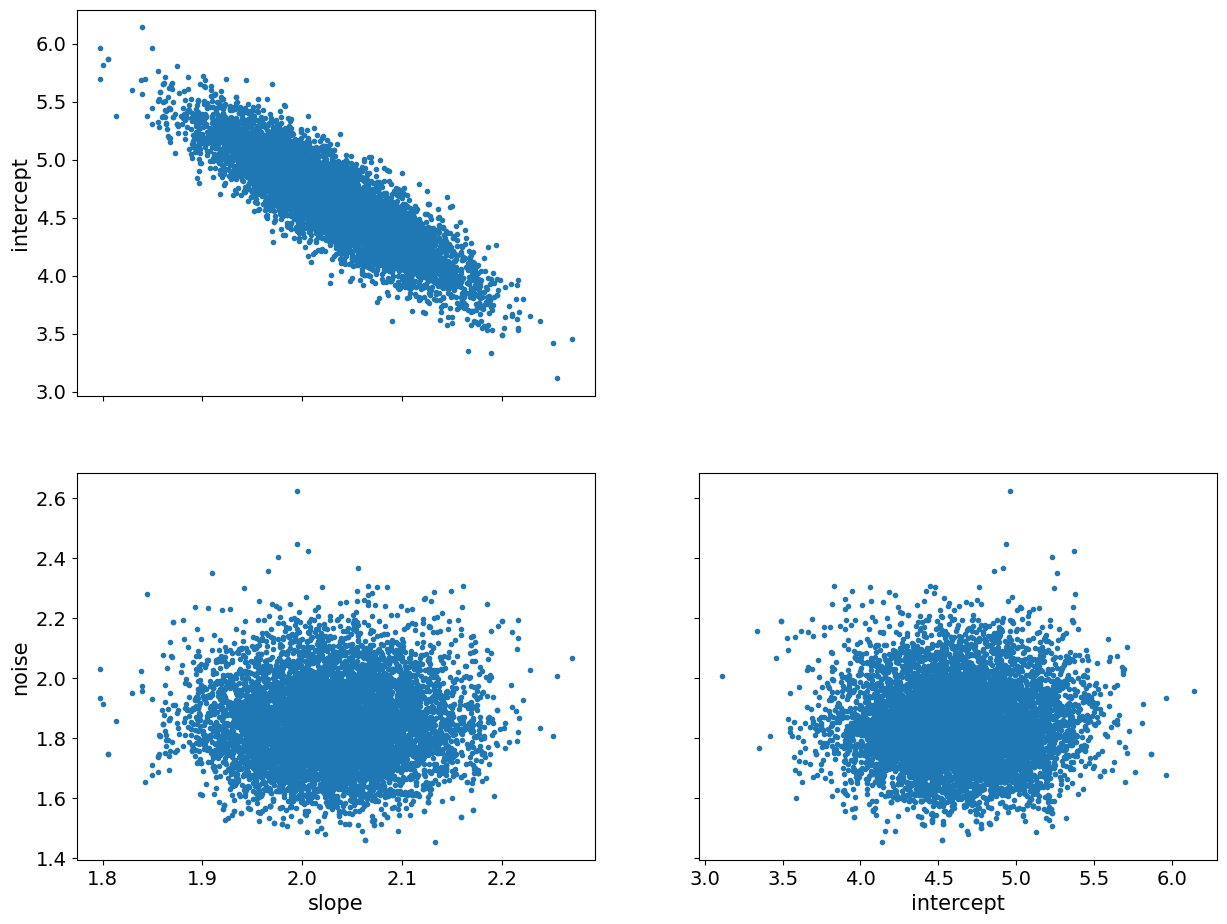

In [5]:
pm.pairplot(trace)
plt.show()


c:\Users\steve\anaconda3\envs\BayesReg\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


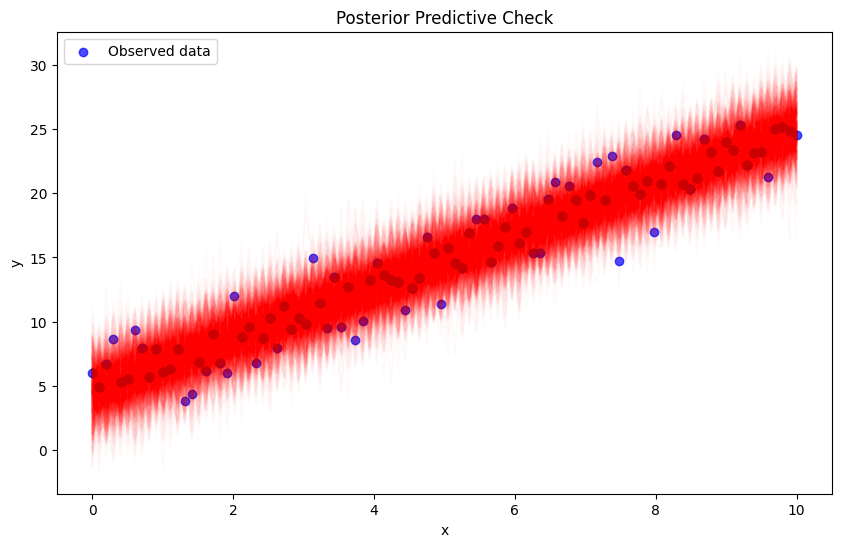

In [6]:
# Sampling from the posterior predictive distribution
with bayesian_model:
    posterior_predictive = pm.sample_posterior_predictive(trace, samples=1000)

# Plotting the observed data against the posterior predictive samples
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Observed data", color="blue", alpha=0.7)
plt.plot(x, posterior_predictive["likelihood"].T, color="red", alpha=0.02)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Posterior Predictive Check")
plt.legend()
plt.show()


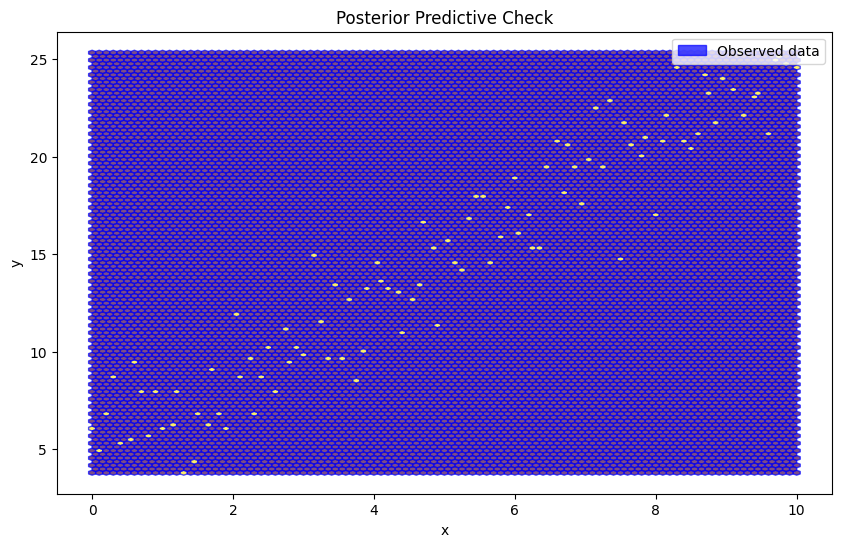

In [8]:
# Sampling from the posterior predictive distribution
with bayesian_model:
    posterior_predictive = pm.sample_posterior_predictive(trace, samples=1000)

# Plotting the observed data against the posterior predictive samples
plt.figure(figsize=(10, 6))
plt.hexbin(x, y, label="Observed data", color="blue", alpha=0.7)
plt.plot(x, posterior_predictive["likelihood"].T, color="red", alpha=0.02)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Posterior Predictive Check")
plt.legend()
plt.show()
